<a href="https://colab.research.google.com/github/Sandy200531/code/blob/main/logistic_regression(keras_dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing important libraries and dataset**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout

Get the data and pre-process it


In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train.shape ,y_train.shape,X_test.shape,y_test.shape



((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

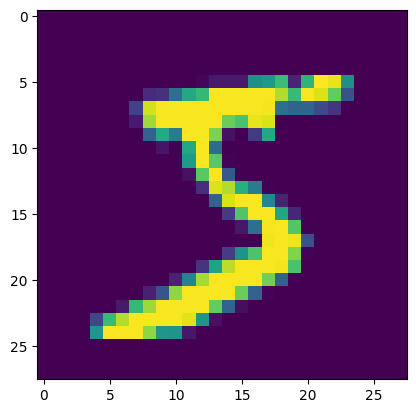

In [ ]:
plt.imshow(X_train[0])

In [ ]:
def plot_input_img(i):
    plt.imshow(X_train[i],cmap='binary')
    plt.title(y_train[i])
    plt.show()

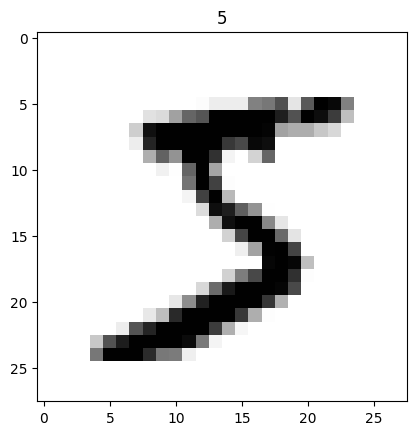

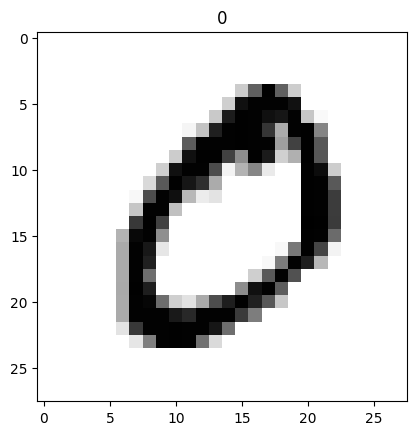

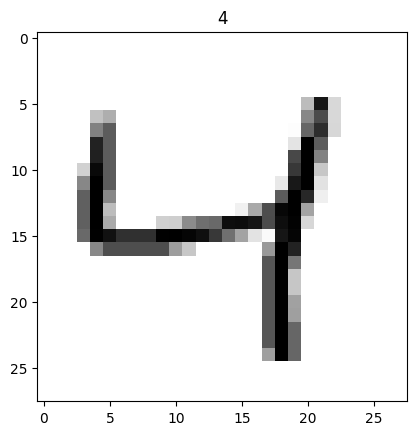

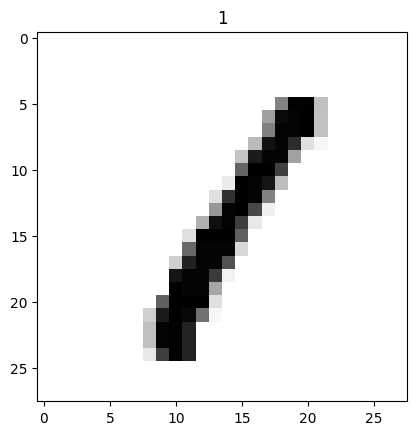

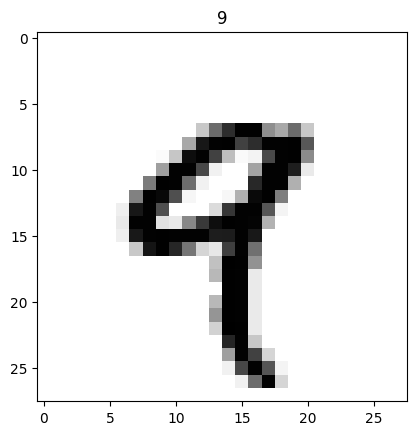

In [ ]:
for i in range(5):
    plot_input_img(i)

### **preprocess the images**

In [ ]:
#preprocess the images

#Noramalizing the image to [0,1] range
X_train = X_train.astype(np.float32)/255
X_test = X_test.astype(np.float32)/255
#reshape/ expand the dimension of images to (28,28,1)
X_train = X_train.reshape((X_train.shape[0],28,28,1))
X_test = X_test.reshape((X_test.shape[0], 28, 28))

#convert classes to one hot vectors
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [ ]:
print(X_train.shape)
print(y_train.shape)


(60000, 28, 28, 1)
(60000, 10)


In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))

model.add(Flatten())

model.add(Dropout(0.25))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [ ]:
#callbacks
from keras.callbacks import EarlyStopping,ModelCheckpoint
#Earlystopping
es=EarlyStopping(monitor='val_acc',min_delta=0.01,patience=4,verbose=1)
#Model checkpoint
mc= ModelCheckpoint("./bestmodel.hs",monitor="val_acc",verbose=1,save_best_only=True)
cb=[es,mc]

**MODEL TRAINING**

In [ ]:

s=model.fit(X_train,y_train,epochs=50,validation_split=0.2)

Epoch 1/50
1500/1500 [==============================] - 13s 5ms/step - loss: 0.1584 - accuracy: 0.9512 - val_loss: 0.0606 - val_accuracy: 0.9823
Epoch 2/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0530 - accuracy: 0.9830 - val_loss: 0.0397 - val_accuracy: 0.9877
Epoch 3/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0380 - accuracy: 0.9882 - val_loss: 0.0347 - val_accuracy: 0.9900
Epoch 4/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0303 - accuracy: 0.9899 - val_loss: 0.0358 - val_accuracy: 0.9893
Epoch 5/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0225 - accuracy: 0.9929 - val_loss: 0.0342 - val_accuracy: 0.9899
Epoch 6/50
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0193 - accuracy: 0.9935 - val_loss: 0.0309 - val_accuracy: 0.9913
Epoch 7/50
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0156 - accuracy: 0.9944 - val_loss: 0.0355 - val_accuracy